**Ссылка на отчет:**
https://docs.google.com/document/d/17DD823yDdc8cT36tH9_diKjWPUbbO4F5FOAveNlNtW0/edit?usp=sharing

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn.feature_selection
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,  LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

D:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('pokemon.csv')
df.head(100)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Grimer,Poison,NaN,80,80,50,40,50,25,1,False
96,97,Muk,Poison,NaN,105,105,75,65,100,50,1,False
97,98,Shellder,Water,NaN,30,65,100,45,25,40,1,False
98,99,Cloyster,Water,Ice,50,95,180,85,45,70,1,False


In [11]:
legendary_df = df[df['Legendary'] == 1]


legendary_df.describe(include='all')


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,65.000000,65,65,40,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65
unique,NaN,65,15,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,Articuno,Psychic,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,1,14,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
mean,520.353846,NaN,NaN,NaN,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231,NaN
std,192.473085,NaN,NaN,NaN,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262,NaN
min,157.000000,NaN,NaN,NaN,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000,NaN
25%,420.000000,NaN,NaN,NaN,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000,NaN
50%,541.000000,NaN,NaN,NaN,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000,NaN
75%,705.000000,NaN,NaN,NaN,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000,NaN


In [4]:
df = df.drop(["#"], axis=1)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB
None


In [6]:
pd.options.display.max_columns = df.shape[1]
df.describe(include='all')

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Bulbasaur,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


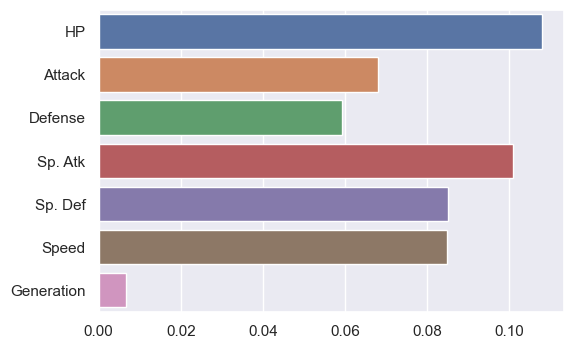

In [9]:
sns.set(rc={'figure.dpi':100})
label = 'Legendary'
features = [c for c in df.columns if c != label and df.dtypes[c] != 'object']
X = df.loc[:,features]
y = df[label]
mi = sklearn.feature_selection.mutual_info_classif(X, y)
ax = sns.barplot(x=mi, y=features)

In [10]:
data = df.drop(["Name", "Type 1", "Type 2", "Attack", "Defense", "Sp. Def", "Speed", "Generation"], axis=1)

In [11]:
data.head()

,HP,Sp. Atk,Legendary
0,45,65,False
1,60,80,False
2,80,100,False
3,80,122,False
4,39,60,False


### График рассеяния всей выборки

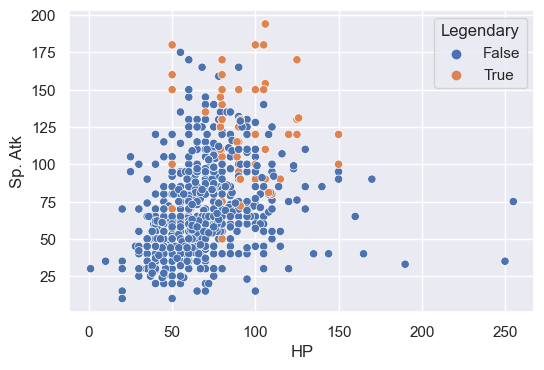

In [302]:
ax = sns.scatterplot(data=data, x='HP', y='Sp. Atk', hue=label, palette="deep")

In [309]:
sampled_data = data.sample(400, random_state=42)

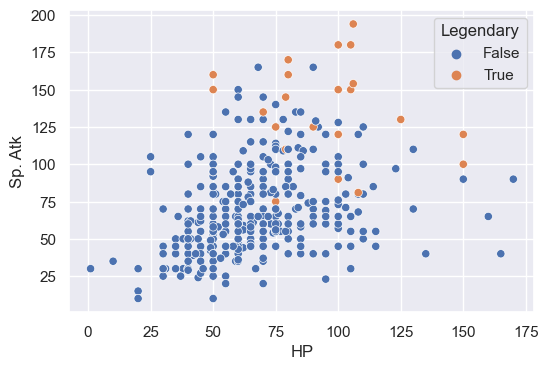

In [310]:
ax = sns.scatterplot(data=sampled_data, x='HP', y='Sp. Atk', hue=label, palette="deep")

In [312]:
x='HP'; y='Sp. Atk'

In [313]:
def plot_creater(x, y, data, model, title):
    fig, ax = plt.subplots()
    xlim = (data[x].min(), data[x].max())
    ylim = (data[y].min(), data[y].max())
    model.fit(data.loc[:,[x,y]], data[label])
    grid_x = np.linspace(data[x].min(), data[x].max(), 100)
    grid_y = np.linspace(data[y].min(), data[y].max(), 100)
    xx, yy = np.meshgrid(grid_x, grid_y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
    ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

    ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_title(title)

### Decision Tree

In [314]:
# underfitting
decision_tree = DecisionTreeClassifier(max_depth=1)

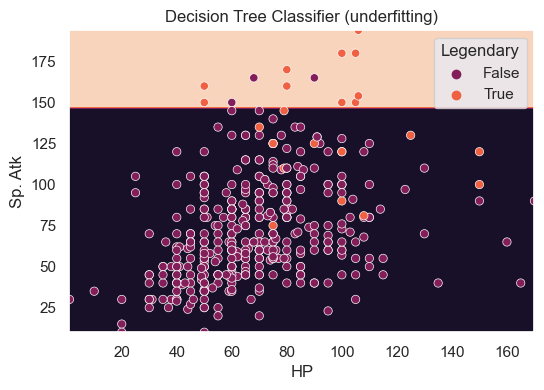

In [315]:
plot_creater(x, y, sampled_data, decision_tree, 'Decision Tree Classifier (underfitting)')

In [398]:
# overfitting
decision_tree_f = DecisionTreeClassifier(min_samples_leaf=2, max_depth=None)

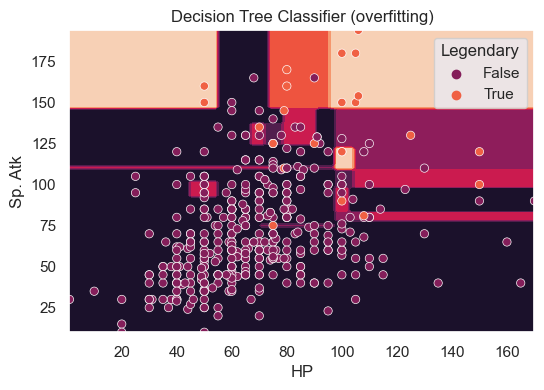

In [399]:
plot_creater(x, y, sampled_data, decision_tree_f, 'Decision Tree Classifier (overfitting)')

### KNN

In [318]:
# underfitting
knn = KNeighborsClassifier(n_neighbors=1)

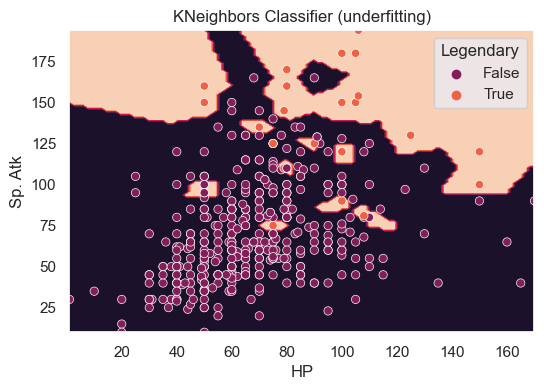

In [319]:
plot_creater(x, y, sampled_data, knn, 'KNeighbors Classifier (underfitting)')

In [320]:
# overfitting
knn_f = KNeighborsClassifier(n_neighbors=40)

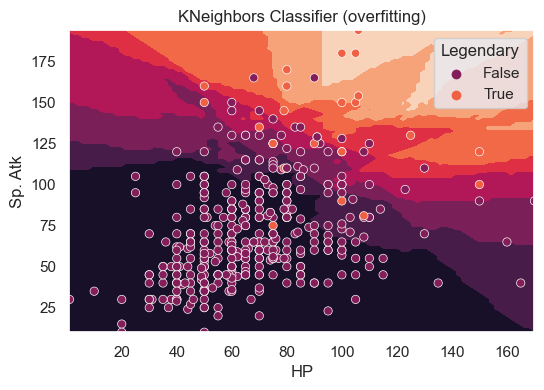

In [321]:
plot_creater(x, y, sampled_data, knn_f, 'KNeighbors Classifier (overfitting)')

### SVM

In [322]:
# underfitting
svm = SVC(kernel='rbf', probability=True, C=0.00000001)

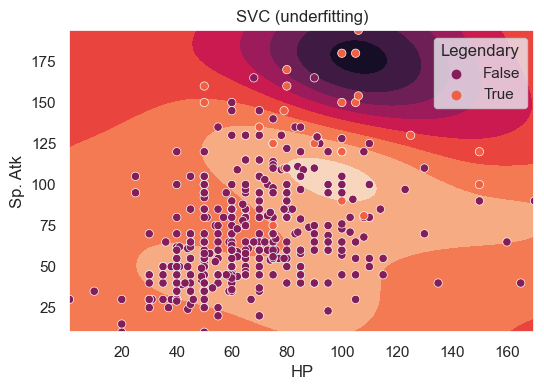

In [323]:
plot_creater(x, y, sampled_data, svm, 'SVC (underfitting)')

In [324]:
# overfitting
svm_f = SVC(kernel='rbf', probability=True, C=0.1)

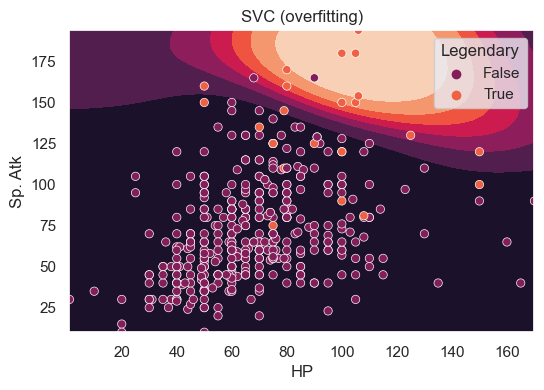

In [326]:
plot_creater(x, y, sampled_data, svm_f, 'SVC (overfitting)')

### Linear Regression

In [333]:
sampled_data_reg = sampled_data.sample(frac=0.2, random_state=42)

In [327]:
model = LinearRegression()

Text(0.5, 1.0, 'Linear Regression')

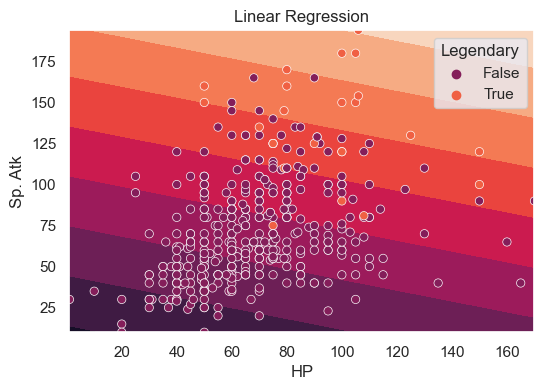

In [328]:
fig, ax = plt.subplots()
xlim = (sampled_data[x].min(), sampled_data[x].max())
ylim = (sampled_data[y].min(), sampled_data[y].max())
model.fit(sampled_data.loc[:, [x, y]], sampled_data[label])

grid_x = np.linspace(sampled_data[x].min(), sampled_data[x].max(), 100)
grid_y = np.linspace(sampled_data[y].min(), sampled_data[y].max(), 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]

prediction = model.predict(grid).reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=sampled_data, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_title('Linear Regression')

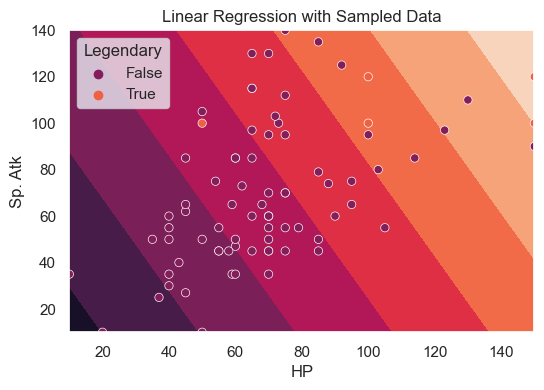

In [334]:
fig, ax = plt.subplots()
xlim = (sampled_data_reg[x].min(), sampled_data_reg[x].max())
ylim = (sampled_data_reg[y].min(), sampled_data_reg[y].max())
model.fit(sampled_data_reg.loc[:, [x, y]], sampled_data_reg[label])

grid_x = np.linspace(sampled_data_reg[x].min(), sampled_data_reg[x].max(), 100)
grid_y = np.linspace(sampled_data_reg[y].min(), sampled_data_reg[y].max(), 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]

prediction = model.predict(grid).reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=sampled_data_reg, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_title('Linear Regression with Sampled Data')

plt.show()

### Logistic Regression

In [391]:
log_reg = LogisticRegression(class_weight='balanced')

Text(0.5, 1.0, 'Logistic Regression')

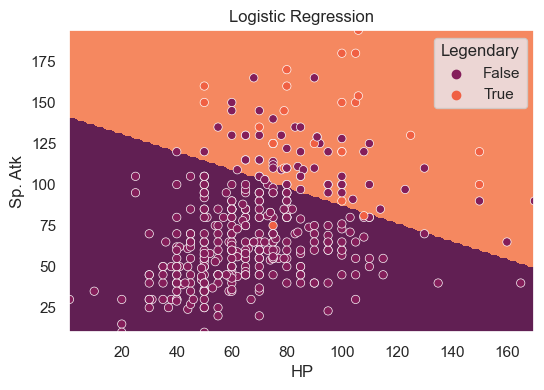

In [392]:
fig, ax = plt.subplots()
xlim = (sampled_data[x].min(), sampled_data[x].max())
ylim = (sampled_data[y].min(), sampled_data[y].max())
log_reg.fit(sampled_data.loc[:, [x, y]], sampled_data[label])

grid_x = np.linspace(sampled_data[x].min(), sampled_data[x].max(), 100)
grid_y = np.linspace(sampled_data[y].min(), sampled_data[y].max(), 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]

prediction = log_reg.predict(grid).reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=sampled_data, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_title('Logistic Regression')

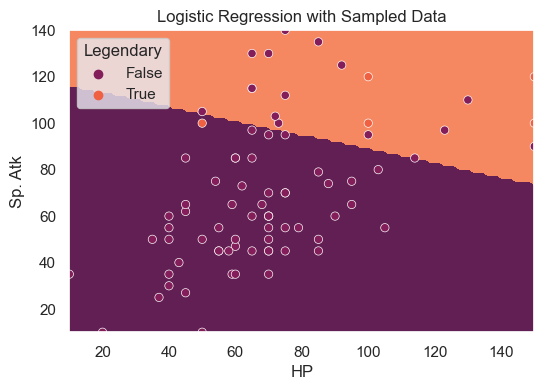

In [335]:
fig, ax = plt.subplots()
xlim = (sampled_data_reg[x].min(), sampled_data_reg[x].max())
ylim = (sampled_data_reg[y].min(), sampled_data_reg[y].max())
log_reg.fit(sampled_data_reg.loc[:, [x, y]], sampled_data_reg[label])

grid_x = np.linspace(sampled_data_reg[x].min(), sampled_data_reg[x].max(), 100)
grid_y = np.linspace(sampled_data_reg[y].min(), sampled_data_reg[y].max(), 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]

prediction = log_reg.predict(grid).reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=sampled_data_reg, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_title('Logistic Regression with Sampled Data')

plt.show()

### Linear Support Vector Classification 

In [337]:
model = LinearSVC(max_iter=100000)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 1.0, 'LinearSVC')

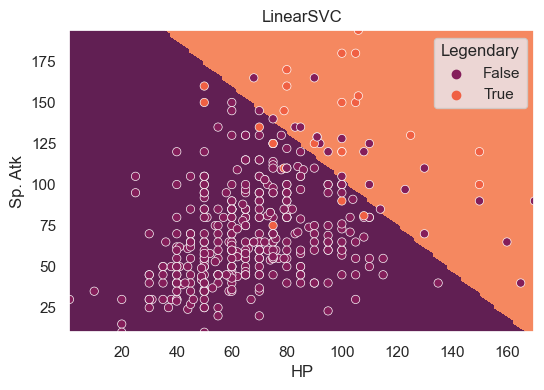

In [338]:
fig, ax = plt.subplots()
xlim = (sampled_data[x].min(), sampled_data[x].max())
ylim = (sampled_data[y].min(), sampled_data[y].max())
model.fit(sampled_data.loc[:, [x, y]], sampled_data[label])

grid_x = np.linspace(sampled_data[x].min(), sampled_data[x].max(), 100)
grid_y = np.linspace(sampled_data[y].min(), sampled_data[y].max(), 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]

prediction = model.predict(grid).reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=sampled_data, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_title('LinearSVC')

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


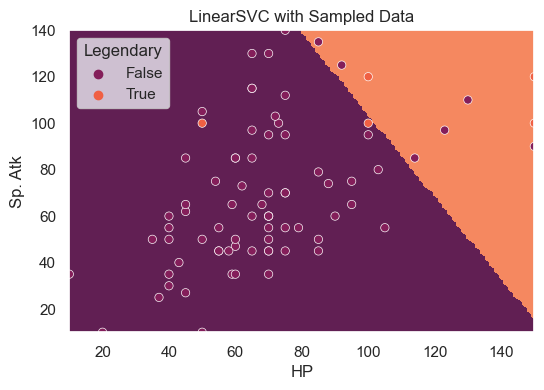

In [339]:
fig, ax = plt.subplots()
xlim = (sampled_data_reg[x].min(), sampled_data_reg[x].max())
ylim = (sampled_data_reg[y].min(), sampled_data_reg[y].max())
model.fit(sampled_data.loc[:, [x, y]], sampled_data[label])

grid_x = np.linspace(sampled_data_reg[x].min(), sampled_data_reg[x].max(), 100)
grid_y = np.linspace(sampled_data_reg[y].min(), sampled_data_reg[y].max(), 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]

prediction = model.predict(grid).reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=sampled_data_reg, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.set_title('LinearSVC with Sampled Data')

plt.show()

### Naive Bayes

In [340]:
nb_classifier = GaussianNB()

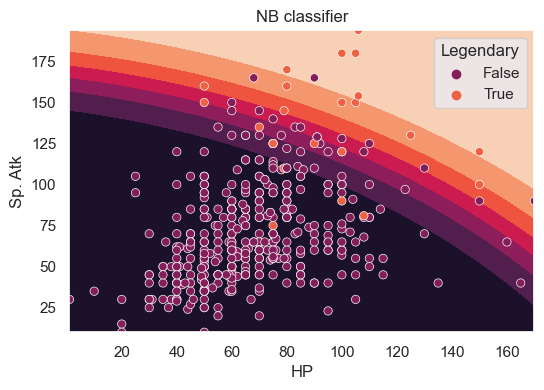

In [341]:
plot_creater(x, y, sampled_data, nb_classifier, 'NB classifier')

### Extra Trees Classifier

In [342]:
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

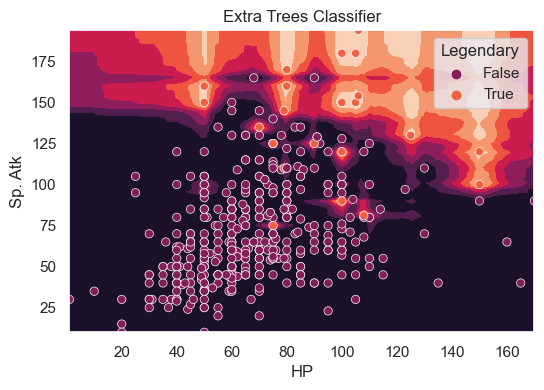

In [343]:
plot_creater(x, y, sampled_data, et_classifier, 'Extra Trees Classifier')

### Метрики качества

(0.0, 1.0)

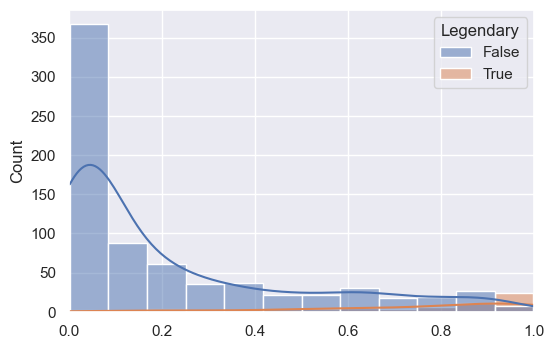

In [393]:
fig, ax = plt.subplots()

prediction = log_reg.predict_proba(data.loc[:,[x,y]])[:,1]

ax = sns.histplot(data=data, x=prediction, hue=label, kde=True) 

ax.set_xlim(0, 1)

In [394]:
discrimination_threshold = 0.7
predictions = (prediction > discrimination_threshold).astype(int)

c_matrix = confusion_matrix(data[label], predictions)

accuracy = accuracy_score(data[label], predictions)
precision = precision_score(data[label], predictions)
recall = recall_score(data[label], predictions)
f1 = f1_score(data[label], predictions)

fpr = c_matrix[0, 1] / (c_matrix[0, 0] + c_matrix[0, 1])
tnr = 1 - fpr
fnr = 1 - recall
balanced_accuracy = balanced_accuracy_score(data[label], predictions)

In [395]:
report = classification_report(data[label], predictions)
print(report)

              precision    recall  f1-score   support

       False       0.97      0.91      0.94       735
        True       0.39      0.63      0.49        65

    accuracy                           0.89       800
   macro avg       0.68      0.77      0.71       800
weighted avg       0.92      0.89      0.90       800



In [396]:
print(f"Confusion Matrix:\n{c_matrix}")

Confusion Matrix:
[[672  63]
 [ 24  41]]


In [397]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','Balanced Accuracy', 'TNR', 'FPR', 'FNR'],
    'Value': [accuracy, precision, recall, f1, balanced_accuracy, tnr, fpr,  fnr]
})

print(results)

              Metric     Value
0           Accuracy  0.891250
1          Precision  0.394231
2             Recall  0.630769
3           F1 Score  0.485207
4  Balanced Accuracy  0.772527
5                TNR  0.914286
6                FPR  0.085714
7                FNR  0.369231


(0.0, 1.0)

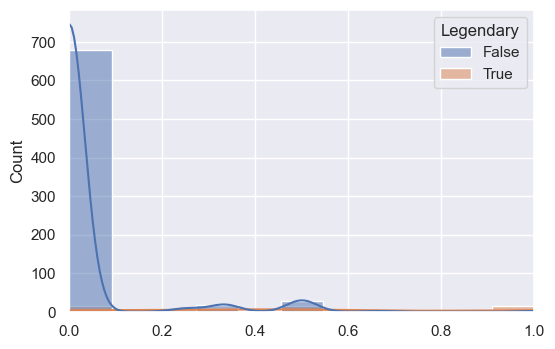

In [404]:
fig, ax = plt.subplots()

prediction = decision_tree_f.predict_proba(data.loc[:,[x,y]])[:,1]

ax = sns.histplot(data=data, x=prediction, hue=label, kde=True)

ax.set_xlim(0, 1)

In [405]:
discrimination_threshold = 0.5

predictions = (prediction > discrimination_threshold).astype(int)

c_matrix = confusion_matrix(data[label], predictions)

accuracy = accuracy_score(data[label], predictions)
precision = precision_score(data[label], predictions)
recall = recall_score(data[label], predictions)
f1 = f1_score(data[label], predictions)

fpr = c_matrix[0, 1] / (c_matrix[0, 0] + c_matrix[0, 1])
tnr = 1 - fpr
fnr = 1 - recall
balanced_accuracy = balanced_accuracy_score(data[label], predictions)

In [406]:
print(f"Confusion Matrix:\n{c_matrix}")

Confusion Matrix:
[[731   4]
 [ 45  20]]


In [407]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','Balanced Accuracy', 'TNR', 'FPR', 'FNR'],
    'Value': [accuracy, precision, recall, f1, balanced_accuracy, tnr, fpr,  fnr]
})

print(results)

              Metric     Value
0           Accuracy  0.938750
1          Precision  0.833333
2             Recall  0.307692
3           F1 Score  0.449438
4  Balanced Accuracy  0.651125
5                TNR  0.994558
6                FPR  0.005442
7                FNR  0.692308
